# 独立主成分分析(ICA)
## 課題2 (speechB)

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.io import wavfile

In [55]:
# 観測データを読み込む
sample_rate1, data1 = wavfile.read("speechB1.wav")
sample_rate2, data2 = wavfile.read("speechB2.wav")
sample_rate3, data3 = wavfile.read("speechB3.wav")

In [56]:
duration = data1.shape[0] / sample_rate1 # 秒
print(duration)

14.001625


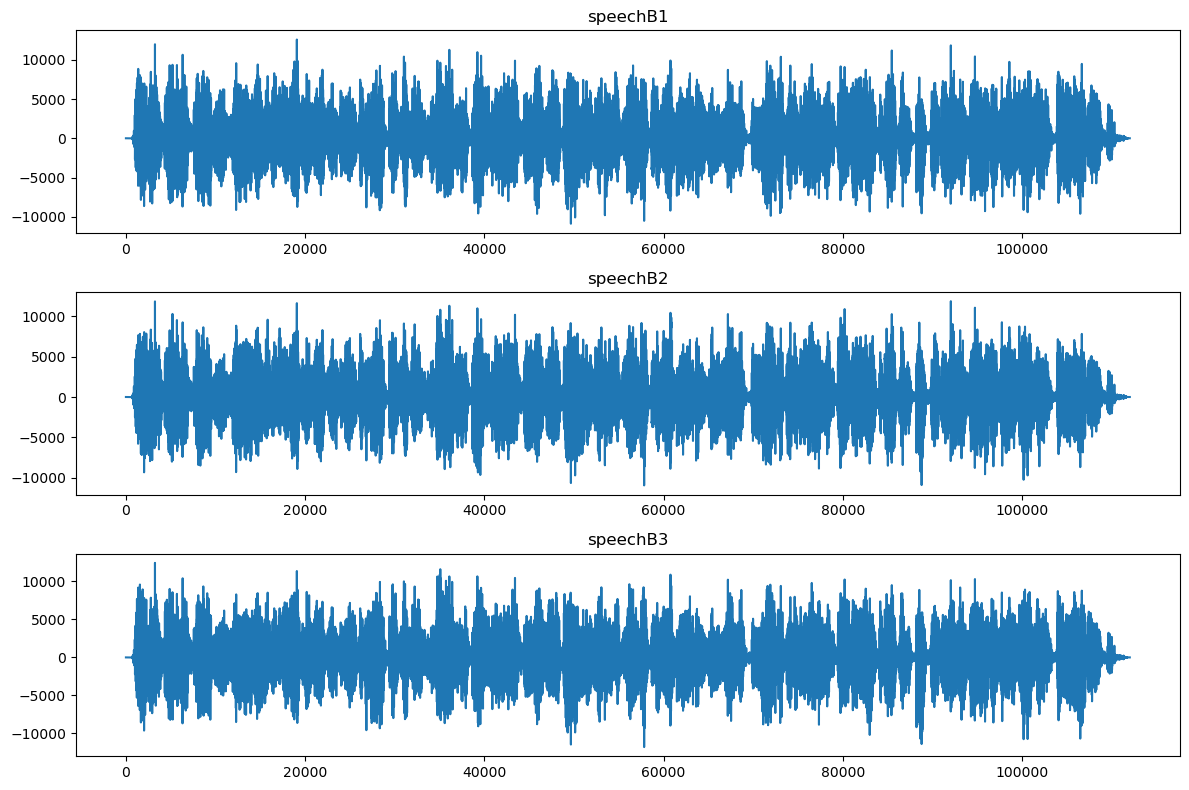

In [57]:
# 観測データを表示してみる
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title("speechB1")
plt.plot(data1)

plt.subplot(3, 1, 2)
plt.title("speechB2")
plt.plot(data2)

plt.subplot(3, 1, 3)
plt.title("speechB3")
plt.plot(data3)

plt.tight_layout()
plt.show()

In [58]:
# サンプル数
n = data1.shape[0]

# 観測データ
mat_x= np.stack((data1, data2, data3)).reshape(3, -1)
mat_x = np.asmatrix(mat_x)

# 平均が0になるように調整
mat_x = mat_x - np.mean(mat_x, axis=1)

# 共分散行列
mat_cov = (mat_x @ mat_x.T) / n
print("共分散行列 mat_cov =\n", mat_cov)

# mat_covを対角化する
eigenvalues, P = np.linalg.eig(mat_cov)
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)
print("P = \n", P)
print("D = \n", D)
print("P^-1 = \n", P_inv)

# 行列Vを作る
D2 = np.diag(eigenvalues ** (-1/2))
mat_v = P @ D2 @ P_inv
print("V = \n", mat_v)

# 白色化後の行列
mat_z = mat_v @ mat_x
print("mat_z = \n", mat_z)

# mat_zの共分散行列は単位行列になるはず
print("mat_zの共分散行列(単位行列になるはず、、)\n", np.matmul(mat_z, mat_z.T) / n)

共分散行列 mat_cov =
 [[5419448.86347846 5186497.26320269 5216423.05093043]
 [5186497.26320269 5275067.03680963 5151720.14098495]
 [5216423.05093043 5151720.14098495 5339616.0680017 ]]
P = 
 [[-0.58134719 -0.80055816  0.14540315]
 [-0.57358624  0.2764768  -0.77107678]
 [-0.57709121  0.53166457  0.61991816]]
D = 
 [[15714940.85362034        0.                0.        ]
 [       0.           163948.76092839        0.        ]
 [       0.                0.           155242.35374108]]
P^-1 = 
 [[-0.58134719 -0.57358624 -0.57709121]
 [-0.80055816  0.2764768   0.53166457]
 [ 0.14540315 -0.77107678  0.61991816]]
V = 
 [[ 0.00172173 -0.00074707 -0.00073778]
 [-0.00074707  0.00178078 -0.00076665]
 [-0.00073778 -0.00076665  0.00175747]]
mat_z = 
 [[0.0003233  0.0003233  0.0003233  ... 0.0003233  0.0003233  0.0003233 ]
 [0.00046505 0.00046505 0.00046505 ... 0.00046505 0.00046505 0.00046505]
 [0.00070157 0.00070157 0.00070157 ... 0.00070157 0.00070157 0.00070157]]
mat_zの共分散行列(単位行列になるはず、、)
 [[ 1.000000

In [59]:
#　Independent Component Analysis
def ica(seed):
    global mat_z
    mat_z = np.asarray(mat_z)
    np.random.seed(seed)
    w_prev = np.random.rand(3, 1)
    w_prev = w_prev / np.linalg.norm(w_prev)
    w = w_prev
    compare = np.array([[10, 10, 10]])

    while np.linalg.norm(compare) > 1e-9:
        zwz3 = mat_z * ((w_prev.T @ mat_z) ** 3)
        zwz3 = zwz3.mean(axis = 1).reshape(-1, 1)
        w = zwz3 - 3 * w_prev
        if w[0] < 0:
            w = -w
        w = w / np.linalg.norm(w)
        compare = w_prev - w
        w_prev = w
        
    mat_z = np.asmatrix(mat_z)
    return w

In [60]:
# 異なるベクトルを３つ取り出す
ws = []
for i in range(1, 21):
    w = ica(i)
    ws.append(w)
    print(f"ica({i}):\n {w}")

ica(1):
 [[ 0.00731244]
 [-0.9999337 ]
 [ 0.0088946 ]]
ica(2):
 [[2.54713972e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(3):
 [[ 0.00731244]
 [-0.9999337 ]
 [ 0.0088946 ]]
ica(4):
 [[2.54713964e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(5):
 [[ 0.00731244]
 [-0.9999337 ]
 [ 0.0088946 ]]
ica(6):
 [[2.54714001e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(7):
 [[ 0.00731244]
 [-0.9999337 ]
 [ 0.0088946 ]]
ica(8):
 [[2.54713965e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(9):
 [[2.54713967e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(10):
 [[ 0.99961699]
 [ 0.0203788 ]
 [-0.01872384]]
ica(11):
 [[2.54713971e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(12):
 [[ 0.00731244]
 [-0.9999337 ]
 [ 0.0088946 ]]
ica(13):
 [[2.54714021e-04]
 [5.30074735e-03]
 [9.99985919e-01]]
ica(14):
 [[2.54713968e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(15):
 [[ 0.99961699]
 [ 0.0203788 ]
 [-0.01872384]]
ica(16):
 [[2.54713984e-04]
 [5.30074734e-03]
 [9.99985919e-01]]
ica(17):
 [[ 0.00731244]
 [-0.99

In [61]:
# ws[0]とws[1]とws[9]が異なるとわかったので、
mat_w = np.stack((ws[0], ws[1], ws[9])).reshape(3, -1)
print("mat_w = \n", mat_w)

# 信号源データ
mat_y = mat_w @ mat_z
print("mat_y = \n", mat_y)
print(mat_y.shape)

# mat_yの絶対値の最大を確認
print("max of mat_y:\n", mat_y.max(axis=1))
print("min of mat_y:\n", mat_y.min(axis=1))

mat_w = 
 [[ 7.31243750e-03 -9.99933705e-01  8.89459760e-03]
 [ 2.54713972e-04  5.30074734e-03  9.99985919e-01]
 [ 9.99616988e-01  2.03787964e-02 -1.87238371e-02]]
mat_y = 
 [[-0.00045641 -0.00045641 -0.00045641 ... -0.00045641 -0.00045641
  -0.00045641]
 [ 0.0007041   0.0007041   0.0007041  ...  0.0007041   0.0007041
   0.0007041 ]
 [ 0.00031952  0.00031952  0.00031952 ...  0.00031952  0.00031952
   0.00031952]]
(3, 112013)
max of mat_y:
 [[5.06531757]
 [5.73703143]
 [5.23799227]]
min of mat_y:
 [[-5.78874685]
 [-5.90701957]
 [-4.94531457]]


In [62]:
# 信号源データを出力する
output1 = (np.asarray(mat_y[0]).flatten() * 32767 / 10).astype(np.int16)
wavfile.write("output1.wav", sample_rate1, output1)

output2 = (np.asarray(mat_y[1]).flatten() * 32767 / 10).astype(np.int16)
wavfile.write("output2.wav", sample_rate2, output2)

output3 = (np.asarray(mat_y[2]).flatten() * 32767 / 10).astype(np.int16)
wavfile.write("output3.wav", sample_rate3, output3)